In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math

In [56]:
df = pd.read_csv("../Dataset/housing.csv")

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [57]:
df.drop(columns=["ocean_proximity"], inplace=True)
df.fillna(0, inplace=True)

train, test= train_test_split(df, test_size=0.3)

In [75]:
test_x = df.drop(columns=["median_house_value"])
test_y = df["median_house_value"]

train.shape

(14448, 9)

In [115]:
samples = []
for sample_size in range(50,50*300, 50):
    train_x, _ = train_test_split(train, train_size=sample_size)
    samples.append(train_x)

ValueError: train_size=14450 should be either positive and smaller than the number of samples 14448 or a float in the (0, 1) range

In [ ]:
len(samples)
def regSummary(y_true, y_pred, sample):
    return{
        "r2_score": r2_score(y_true, y_pred),
        "mae": mean_absolute_error(y_true, y_pred),
        "mse": mean_squared_error(y_true, y_pred),
        "rmse": math.sqrt(mean_squared_error(y_true, y_pred)),
        "Sample Size": len(sample)
}

In [ ]:
errors = []
train_errors = []
for sample in samples:
    data_x = sample.drop(columns="median_house_value")
    data_y = sample["median_house_value"]

    train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2)
    reg = LinearRegression()
    reg.fit(train_x, train_y)    
    
    predict_y = reg.predict(test_x)
    predict_train_error = reg.predict(train_x)

    n = regSummary(test_y, predict_y, sample)
    n1 = regSummary(train_y, predict_train_error, sample)
    train_errors.append(n1)
    errors.append(n)


In [116]:
test_error_df = pd.DataFrame(errors)
train_error_df = pd.DataFrame(train_errors)

In [117]:
def plot_line(x,y,x_label,y_label,axes,label):
    axes.plot(x,y, label=label)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    axes.set_title(f"{x_label} v/s {y_label}")
    axes.legend()

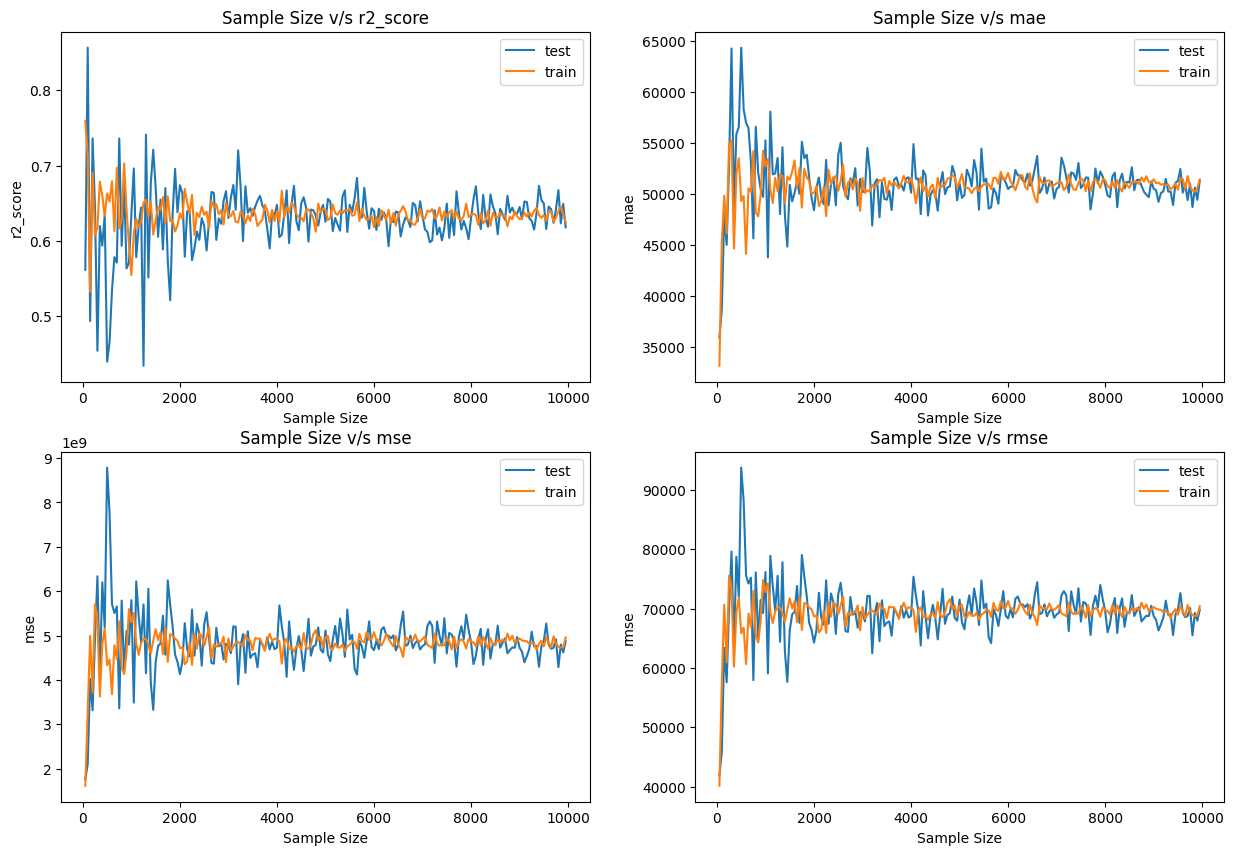

In [118]:
fig, axes = plt.subplots(figsize=(15,10), nrows=2, ncols=2)

axes = axes.flatten()
testcolumns = test_error_df.columns

for ax, col in zip(axes, columns):
    plot_line(test_error_df["Sample Size"], test_error_df[col], x_label="Sample Size", y_label=col, axes=ax,label="test")
    plot_line(train_error_df["Sample Size"], train_error_df[col], x_label="Sample Size", y_label=col, axes=ax, label="train")

